# <span style="color:#F72585"><center>Elementos de la Estadística Bayesiana</center></span>


## <span style="color:#4361EE">Teorema de Bayes</span>


La inferencia a cerca del parámetro  $\boldsymbol{\theta}$ está basada en la distribución posterior distribution que denotamos por $\pi(\boldsymbol{\theta})$ o equivalentemente  $p(\boldsymbol{\theta}|\mathbf{y})$.  The distribución posterior es dada por 

$$
\begin{align}
\pi(\boldsymbol{\theta}):=p(\boldsymbol{\theta}|\mathbf{y}) &=\frac{p(\mathbf{y},\boldsymbol{\theta})}{p(\mathbf{y})}=\frac{p(\mathbf{y},\boldsymbol{\theta})}{\int p(\mathbf{y},\boldsymbol{\theta})d\boldsymbol{\theta}}\\
&=\frac{f(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int f(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\boldsymbol{\theta}} = \frac{f(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{p(\mathbf{y})}\\
&= \frac{\text{verosimilitud}\times \text{a priori}}{\text{marginal de } \mathbf{y}}
\end{align}
$$





### <span style="color:#4CC9F0">Modelo Gaussiano-Gaussiano. Versión 0</span>


Supongamos que $y$ proviene  de una variable aleatoria $Y \sim N(\theta,\sigma^2)$, en donde $\sigma^2$ es conocida.

En este caso, la a priori y la verosimilitud son Gaussianas.

$$
\begin{align*}
\theta &\sim N(\mu,\tau^2)\\
Y|\theta & \sim N(\theta,\sigma^2),
\end{align*}
$$

En consecuencia,  la distribución marginal de $Y$ es  $N(\mu, \sigma^2+\tau^2)$, y la distribución posterior también es Gaussiana con media and varianza dadas por

$$
\begin{align}
E[\theta|Y] &= B\mu + (1-B)Y\\
Var[\theta|Y] & =(1-B)\sigma^2,
\end{align}
$$
con,
$$
B= \frac{\sigma^2}{\sigma^2+\tau^2}
$$

## <span style="color:#4361EE">Distribución Marginal de la Muestra</span>


### <span style="color:#4CC9F0">Primera Aproximación</span>


La distribución posterior incluye en el denominador, la probabilidad de la muestra observada. Nótese que

$$
\begin{equation}
f(\boldsymbol{\mathcal{y}})=\int f(\boldsymbol{\mathcal{y}}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\boldsymbol{\theta}.
\end{equation}
$$

Es decir que, $f(\boldsymbol{\mathcal{y}})= E_{p(\theta)}[f(\boldsymbol{\mathcal{y}}|\theta)]$. Esta expresión, indica una forma práctica de *estimar* $f(\boldsymbol{\mathcal{y}})$. En efecto, dada una muestra $\{ \theta_1,\theta_2,\ldots,\theta_n\}$ de la distribución a priori $p(\theta)$, entonces

$$
f(\boldsymbol{\mathcal{y}}) \approx \frac{1}{n}\sum_{i=1}^{n} f(\boldsymbol{\mathcal{y}}|\theta_i).
$$

El problema con esta aproximación inicial es que si la a priori y la verosimilitud difieren sustancialmente, la estimación llega a ser muy mala, debido a que $p(\theta)$ puede generar frecuentemente muestras en las cuales la verosimilitud tiene valores muy bajos. También la a priori  puede estar muy concentrada y no muestrear suficientemente valores en donde la  verosimilitud toma valores importantes. La gráfica ilustra esta última situación, en un modelo *Gaussiano-Gaussiano*. Más adelante en el curso mostraremos como obtener estimaciones más adecuadas para $f(\mathbf{y})$.

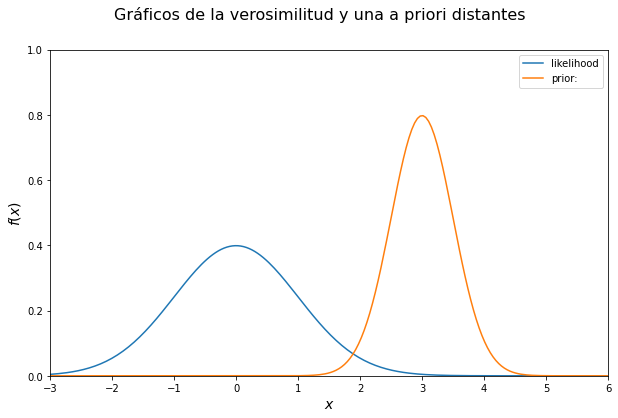

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# parameters of the distributions
mu_prior = 3
sigma_prior = 0.5

mu_likelihood =0
sigma_likelihood =1

# x values to the plot
left = -3
right = 6
x = np.linspace(left,right,200)

fig, ax = plt.subplots(figsize=(10,6))
# delimit y axis
ax.set_ylim(0,1)
ax.set_xlim(left,right)
# compute y values to prior and loglikelihood for the plot
likelihood = stats.norm.pdf(x, loc = mu_likelihood, scale = sigma_likelihood)
prior = stats.norm.pdf(x, loc = mu_prior, scale = sigma_prior)

# plot the posterior
ax.plot(x,likelihood,label = 'likelihood')

# plot the prior
ax.plot(x,prior,label = 'prior:')


ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$f(x)$', fontsize=14)
fig.suptitle('Gráficos de la verosimilitud y una a priori distantes',fontsize=16)
ax.legend()
plt.show()

## <span style="color:#4361EE">Distribución Predictiva</span>


Un  aspecto muy importante de la estadística Bayesiana es la poder predecir valores futuros, con base en los valores ya obtenidos. **La distibución predictiva** de un valor futuro $x$, dados los datos ya observados $\mathbf{y}$ está dada por

$$
\begin{equation}
f(x|\mathbf{y})=\int f(x,\boldsymbol{\theta}|\mathbf{y})d\boldsymbol{\theta}= \int f(x|\boldsymbol{\theta})\pi(\boldsymbol{\theta})d\boldsymbol{\theta} = E_{\pi(\theta)}[f(x|\boldsymbol{\theta})].
\end{equation}
$$

Esta ecuación debe interpretarse de la siguiente manera. Para generar un nuevo valor $x$, dados los valores observados $\mathbf{y}$  haga lo siguiente:

1. Obtenga la posterior a partir de la muestra:  $\pi(\theta) := p(\theta|\boldsymbol{\mathcal{y}})$.
2. Obtenga una muestra de $\theta$ de la posterior: $\theta \sim \pi(\theta)$.
3. Obtenga la muestra para  $x$ de la verosimilitud: $x \sim f(x|\theta)$.

En la clase [Análisis Exploratorio Bayesiano](Analisis_Exploratorio) veremos como hacer esto en Stan, TFP y Pyro.

## <span style="color:#4361EE">Estadística Suficiente</span>


Dada una muestra $\mathbf{y}$ de $n$ observaciones independientes se tiene que la verosimilitud dado el parámetro $\boldsymbol{\theta}$ es 

$$
\begin{align}
f(\mathbf{y}|\boldsymbol{\theta})= \prod_{i=1}^n f(y_i|\boldsymbol{\theta})
\end{align}
$$

Supongamos que existe una [estadística suficiente](https://en.wikipedia.org/wiki/Sufficient_statistic) $S(\boldsymbol{\mathcal{y}})$ para el parámetro $\boldsymbol{\theta}$. Entonces el teorema de factorización de Fisher–Neyman permite escribir

$$
\begin{align*}
f(\mathbf{y}|\boldsymbol{\theta})= h(\mathbf{y})g(S(\mathbf{y})|\boldsymbol{\theta}), 
\end{align*}
$$

en donde $h(\mathbf{y})$ es una función que depende únicamente de los datos y $g(S(\mathbf{y})|\boldsymbol{\theta})$ es una función que depende únicamente de  la estadística suficiente y del parámetro. Entonces se tiene que

$$
\begin{align*}
p(\boldsymbol{\theta}|\mathbf{y}) &=\frac{f(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int f(\mathbf{y}|\boldsymbol{\theta})p(\boldsymbol{\theta})d\boldsymbol{\theta}}\\
&=\frac{h(\mathbf{y}) g(S(\mathbf{y})|\boldsymbol{\theta})p(\boldsymbol{\theta})}{\int h(\mathbf{y}) g(S(\boldsymbol{\mathcal{y}})|\boldsymbol{\theta})p(\boldsymbol{\theta})d\boldsymbol{\theta}}\\
&= \frac{g(\mathbf{s}|\boldsymbol{\theta})p(\boldsymbol{\theta})}{m(\mathbf{s})}= p(\boldsymbol{\theta}|\mathbf{s})
\end{align*}
$$


### <span style="color:#4CC9F0">Modelo Gaussiano-Gaussiano. Versión 1.</span>



Consideremos de nuevo el modelo Gaussiano-Gaussiano.

Como $S(\mathbf{y}) = \bar{\mathbf{y}}$ es suficiente para $\theta$, se tiene que $p(\theta|\mathbf{y})=p(\theta|\bar{\mathbf{y}})$.



Además sabemos que $f(\bar{\mathbf{y}}|\theta)= N(\mu,\sigma^2/n)$. Entonces,

$$
\begin{align*}
p(\theta \mid \bar{\mathbf{y}})&=N\left(\theta \mid \frac{(\sigma^2/n)\mu + \tau^2 \bar{\mathbf{y}}}{(\sigma^2/n)+\tau^2}, \frac{(\sigma^2/n)\tau^2 }{(\sigma^2/n)+\tau^2}\right)\\
&= N\left(\theta \mid \frac{\sigma^2\mu + n\tau^2 \bar{y}}{\sigma^2+n\tau^2}, \frac{\sigma^2\tau^2 }{\sigma^2+n\tau^2}\right)
\end{align*}
$$

## <span style="color:#4361EE">Modelos Bayesianos Jerárquicos</span>


Los modelos considerados anteriormente tienen dos etapas, una para $ f(\mathbf{y}|\boldsymbol{\theta})$, la probabilidad de los datos $y$ dados los parámetros $\boldsymbol {\theta} $ , y uno para $p(\boldsymbol{\theta} | \boldsymbol {\eta}) $, la distribución previa de los parámetros del modelo $ \boldsymbol{\theta}$ dado un vector de hiperparámetros $ \boldsymbol {\eta}$.



Si no estamos seguros sobre el valor adecuado para el parámetro $\boldsymbol{\eta}$, es posible introducir una distribución previa de la segunda etapa, generalmente denominada hiper a priori, que se denota $ h(\boldsymbol{\eta}|\boldsymbol{\omega}_0)$. Esta estrategia define un modelo Bayesiano jerárquico de tres niveles que formalmente se escribe así:

$$
f(\boldsymbol{\theta}|\mathbf{y}) \propto f(y|\boldsymbol{\theta})p(\boldsymbol{\theta}|\eta)p(\eta|\omega_0).
$$

En este caso, la distribución marginal de $y$ es dada por

$$
\begin{equation}
f(x|\boldsymbol{\mathbf{y}})=\int \int f(x|\boldsymbol{\theta}) p(\boldsymbol{\theta}|\boldsymbol{\mathbf{y}},\boldsymbol{\eta}) p(\eta|\omega_0) d\boldsymbol{\theta}d\boldsymbol{\eta}.
\end{equation}
$$

La distribución predictiva en este caso es dada por

$$
\begin{equation}
f(x|\mathbf{y})=\int \int f(x|\boldsymbol{\theta})p(\boldsymbol{\theta}|\mathbf{y},\boldsymbol{\eta}) p(\eta|\omega_0) d\boldsymbol{\theta}d\boldsymbol{\eta}.
\end{equation}
$$

Esta ecuación debe interpretarse de la siguiente manera. Para generar un nuevo valor $x$, dados los valores observados $\mathbf{y}$  haga lo siguiente:

1. Obtenga la posterior a partir de la muestra $\mathbf{y}$:  $\pi(\theta) = p(\theta|\mathbf{y},\boldsymbol{\eta})$.
2. Obtenga una muestra de $\boldsymbol{\eta}$ de la hiper a priori: $\boldsymbol{\eta} \sim p(\boldsymbol{\eta}|\omega_0)$.
2. Obtenga una muestra de $\boldsymbol{\theta}$ de la posterior: $\theta \sim p(\boldsymbol{\eta}|y,\boldsymbol{\eta})$.
3. Obtenga la muestra para  $x$ de la verosimilitud: $x \sim f(x|\theta)$.